# 시계열 다루기
1. 타임스팸트: 특정 시점 (e.g. 2022년 5월 4일 오전 7시)
2. 시간 간격/기간: 특정 시작점과 종료점 사이 시간의 길이 
3. time delta / duration (시간 델타/지속 기간): 정확한 시간의 길이 (e.g. 23.33초의 시간)

### 기본 파이썬 날짜와 시간: datetime / dateutil 

In [1]:
from datetime import datetime
datetime(year = 2015, month = 7, day = 4)

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
from dateutil import parser 
date = parser.parse('4th of July, 2015')
date

datetime.datetime(2015, 7, 4, 0, 0)

In [4]:
date.strftime('%A')

'Saturday'

In [8]:
## numpy로!

import numpy as np

date = np.array('2022-05-01', dtype=np.datetime64)
date # 이제 연산이 빨라짐   

array('2022-05-01', dtype='datetime64[D]')

In [11]:
print(date + np.array(12)) # 12일 더한거
print(date + np.arange(12)) # date 부터 12개 쭈욱!

2022-05-13
['2022-05-01' '2022-05-02' '2022-05-03' '2022-05-04' '2022-05-05'
 '2022-05-06' '2022-05-07' '2022-05-08' '2022-05-09' '2022-05-10'
 '2022-05-11' '2022-05-12']


In [14]:
import pandas as pd
date = pd.to_datetime('4th of July, 2022')
date
date.strftime('%A')

'Monday'

In [15]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07',
               '2022-07-08', '2022-07-09', '2022-07-10', '2022-07-11',
               '2022-07-12', '2022-07-13', '2022-07-14', '2022-07-15'],
              dtype='datetime64[ns]', freq=None)

## 시간으로 인덱싱 하기

In [17]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0,1,2,3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [20]:
data[['2014-07-04', '2015-08-04']] # fancy indexing도 되지롱 
data['2014-08-04':'2015-08-04']

2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [21]:
data['2015'] # 연도만 치면 해당 연도 다 나옴 

2015-07-04    2
2015-08-04    3
dtype: int64

In [23]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015', 
                        '2015-Jul-6', '07-07-2015','20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [28]:
dates.to_period('D') # period   

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [29]:
dates - dates[0] # TimedeltaIndex 빼주긔

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### 정규시퀀스
타임스탬프: pd.date_range();
기간: pd.period_range();
델타: pd.timedelta_range()

In [30]:
pd.date_range('2015-07-03', '2015-07-10') # == pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [31]:
# periodes를 시간으로 바꿔서도 사용 가능 (default는 '일')

pd.date_range('2015-07-03', periods=8, freq = 'H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [32]:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [34]:
pd.timedelta_range(0, periods=10, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [36]:
pd.timedelta_range(0, periods=9, freq='2H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [37]:
## 영업일 오프셋
from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods = 10, freq=BDay()) # 영업일 기준으로 ! 

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10',
               '2015-07-13', '2015-07-14'],
              dtype='datetime64[ns]', freq='B')

## ex. google 종가 이력 적재 (discontinued 되어 셀트리온으로 대체) + CLT (068270)

In [49]:
from pandas_datareader import data
clt= data.DataReader('068270.KS', start='2005', end='2022', data_source='yahoo') # 이제 데이터 야후에서 받아와야 함 ..

In [50]:
clt.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2005-07-19,6715.658203,5677.783691,5843.494629,6715.658203,572140.0,6468.578613
2005-07-20,6706.936523,5712.670410,6706.936523,5712.670410,484542.0,5502.492676
2005-07-21,5738.835449,4997.496582,5625.454102,5006.217773,209364.0,4822.031738
2005-07-22,5102.155762,4823.063477,5102.155762,4866.671875,80145.0,4687.620117
2005-07-25,5189.372070,4796.898926,4796.898926,4927.723145,69941.0,4746.424805


In [51]:
clt_close = clt['Close'] # 종가만 사용해봄

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

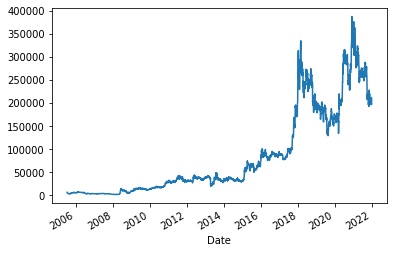

In [55]:
clt_close.plot()
plt.show()

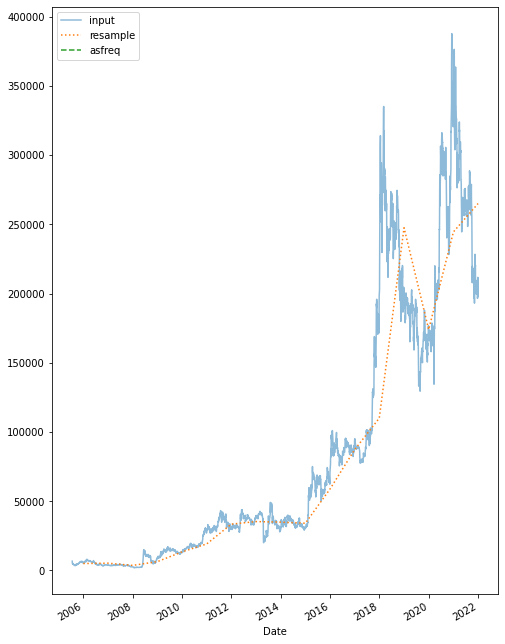

In [60]:
plt.figure(figsize=(8,12))
clt_close.plot(alpha = 0.5, style = '-')
clt_close.resample('BA').mean().plot(style=':')
clt_close.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left')
plt.show()